# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat']) 
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])
        #city_date_unformatted = (city_weather['dt'])
        #city_date_struct = time.localtime(city_date_unformatted)
        #city_date = time.strftime('%Y-%m-%d', city_date_struct)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | marietta
Processing Record 7 of Set 1 | ko pha ngan
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | illizi
Processing Record 14 of Set 1 | santander
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | anatuya
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | port saint john's
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | nova vicosa
Processing Record 22 of Set 1 | olonkinbye

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,21.07,76,0,0.45,US,1725501252
1,tiksi,71.6872,128.8694,2.16,99,100,5.13,RU,1725501252
2,atafu village,-8.5421,-172.5159,27.83,79,74,6.84,TK,1725501252
3,tolanaro,-25.0319,46.9987,20.04,88,40,4.12,MG,1725501253
4,constantia,44.1833,28.6500,17.61,65,6,5.51,RO,1725501253


In [6]:
import os
import pandas as pd

# Ensure the directory exists
output_dir = 'output_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Define the output file path
output_file = os.path.join(output_dir, "cities.csv")

# Export the City_Data into a CSV file
city_data_df.to_csv(output_file, index_label="City_ID")

print(f"Data saved to {output_file}")

Data saved to output_data\cities.csv


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,21.07,76,0,0.45,US,1725501252
1,tiksi,71.6872,128.8694,2.16,99,100,5.13,RU,1725501252
2,atafu village,-8.5421,-172.5159,27.83,79,74,6.84,TK,1725501252
3,tolanaro,-25.0319,46.9987,20.04,88,40,4.12,MG,1725501253
4,constantia,44.1833,28.6500,17.61,65,6,5.51,RO,1725501253


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\alexa\AppData\Local\Temp\ipykernel_17680\1849070412.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, alpha=0.75, cmap='coolwarm')


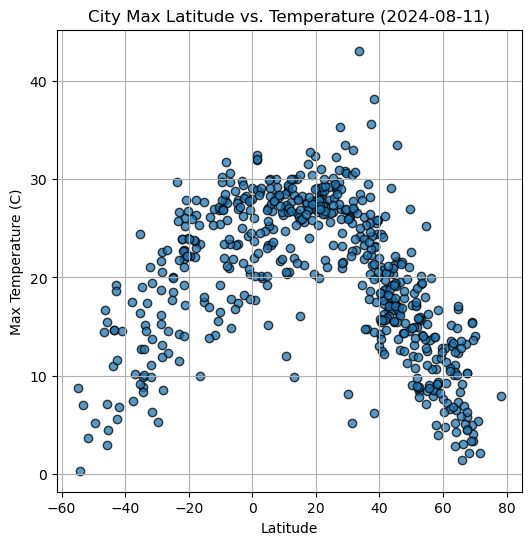

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, alpha=0.75, cmap='coolwarm')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-08-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

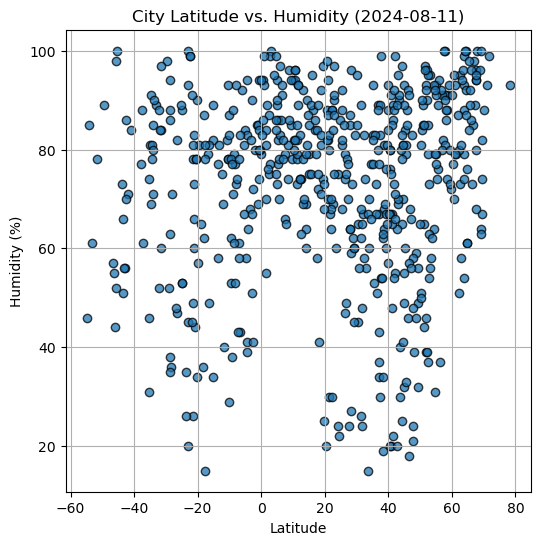

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

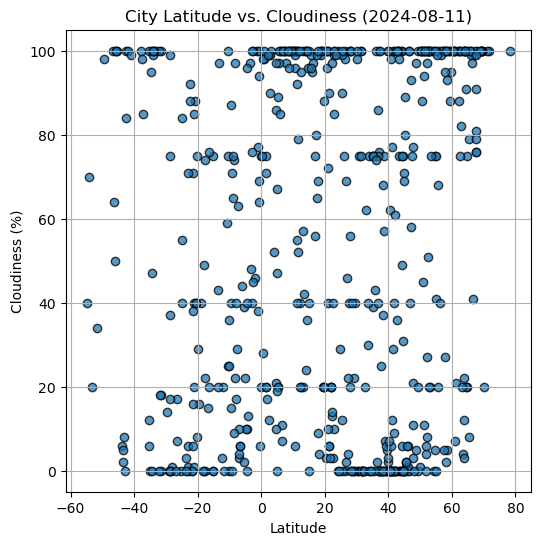

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

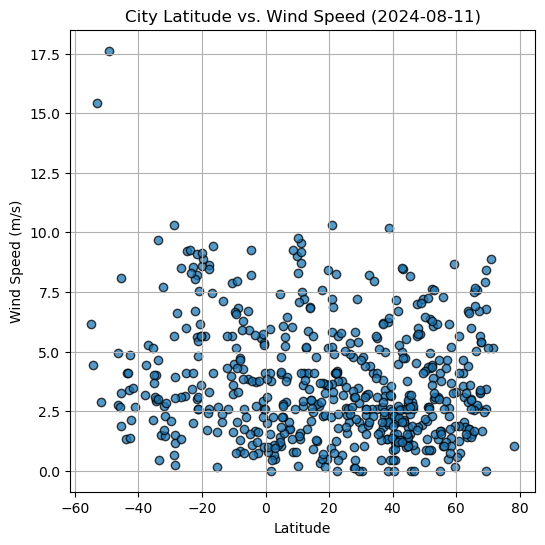

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
  
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regression_line = slope * x_values + intercept
    
    #r^2 value
    r_squared = r_value**2
    
    #scatter plot 
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, linewidths=1, alpha=0.75, label='Data Points')
    plt.plot(x_values, regression_line, "r-", label=f"y={slope:.2f}x + {intercept:.2f}")
    
    # Incorporate other plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #slope
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, xy=(0.01, 0.01), xycoords='axes fraction',
                 fontsize=12, color='red', weight='bold')

    print(f"The R² value is: {r_squared:.16f}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,21.07,76,0,0.45,US,1725501252
1,tiksi,71.6872,128.8694,2.16,99,100,5.13,RU,1725501252
4,constantia,44.1833,28.6500,17.61,65,6,5.51,RO,1725501253
5,marietta,33.9526,-84.5499,24.23,60,75,4.12,US,1725501253
6,ko pha ngan,9.7578,100.0291,26.38,78,100,8.99,TH,1725501253


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atafu village,-8.5421,-172.5159,27.83,79,74,6.84,TK,1725501252
3,tolanaro,-25.0319,46.9987,20.04,88,40,4.12,MG,1725501253
7,puerto natales,-51.7236,-72.4875,3.66,78,34,2.87,CL,1725501253
9,waitangi,-43.9535,-176.5597,11.01,73,6,1.34,NZ,1725501253
11,namibe,-15.1961,12.1522,17.47,89,0,1.61,AO,1725501253


###  Temperature vs. Latitude Linear Regression Plot

The R² value is: 0.5795438489132240


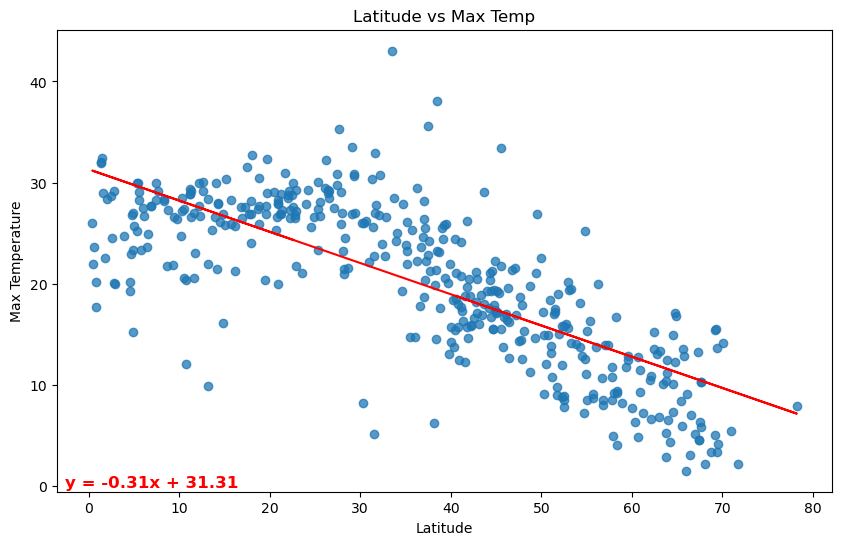

In [16]:

# Linear regression on Northern Hemisphere  
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(
    x_values, 
    y_values, 
    x_label="Latitude", 
    y_label="Max Temperature", 
    title="Latitude vs Max Temp", 
    save_path="output_data/Northern_Hemisphere_Lat_vs_Temp.png")
    
annotation_position="lower_left"

The R² value is: 0.5336125855763965


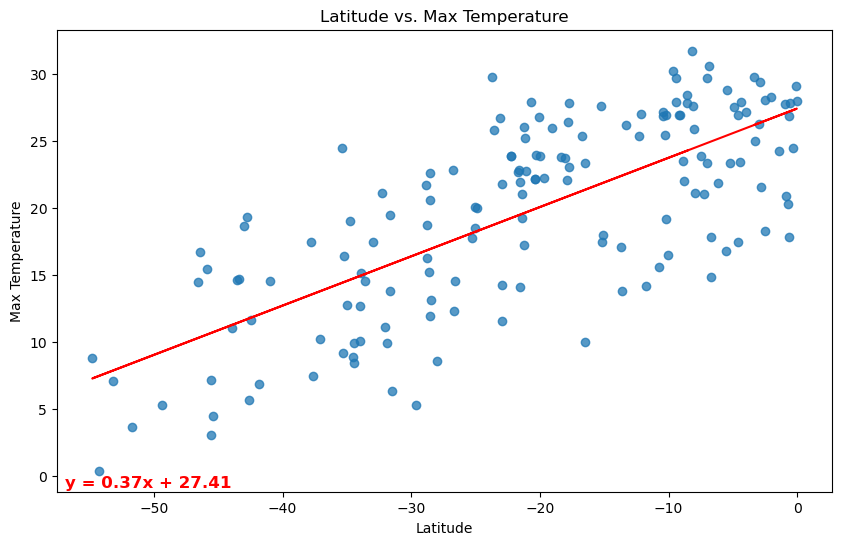

In [17]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Plot linear regression for Southern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    x_values_southern, 
    y_values_southern, 
    x_label="Latitude", 
    y_label="Max Temperature", 
    title="Latitude vs. Max Temperature", 
    save_path="output_data/Southern_Hemisphere_Lat_vs_Temp.png")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R² value is: 0.0005461542979879


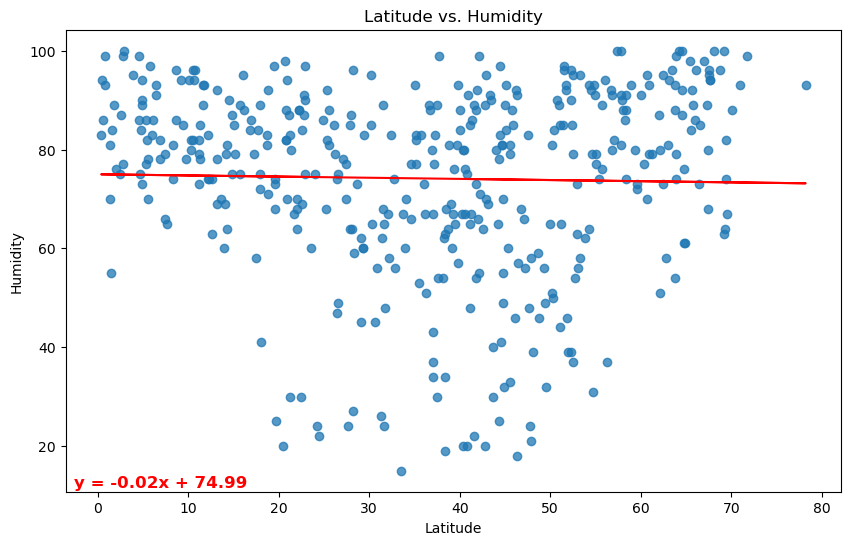

In [18]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

# Plot linear regression for Northern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    x_values_northern, 
    y_values_northern, 
    x_label="Latitude", 
    y_label="Humidity", 
    title="Latitude vs. Humidity", 
    save_path="output_data/Northern_Hemisphere_Lat_vs_Humidity.png")

The R² value is: 0.0011497378859100


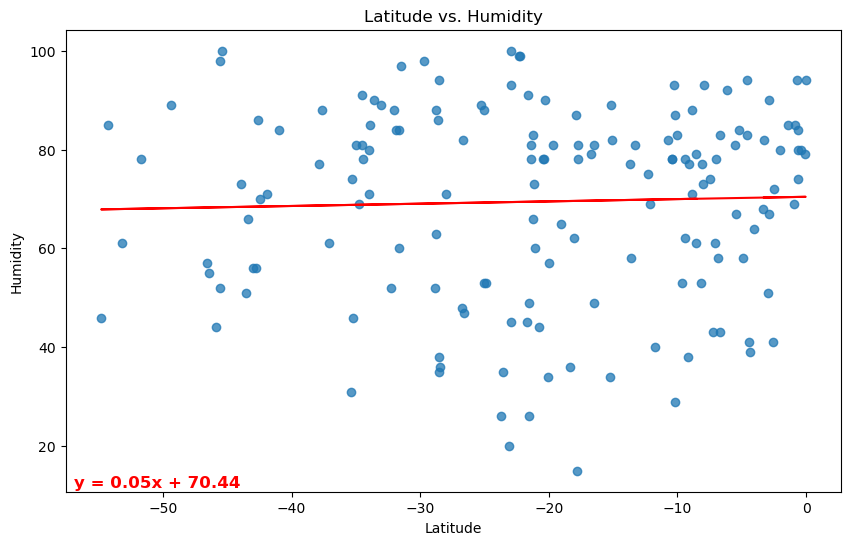

In [19]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

# Plot linear regression for Southern Hemisphere: Latitude vs. Humidity
plot_linear_regression(
    x_values_southern, 
    y_values_southern, 
    x_label="Latitude", 
    y_label="Humidity", 
    title="Latitude vs. Humidity", 
    save_path="output_data/Southern_Hemisphere_Lat_vs_Humidity.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R² value is: 0.0008306052824130


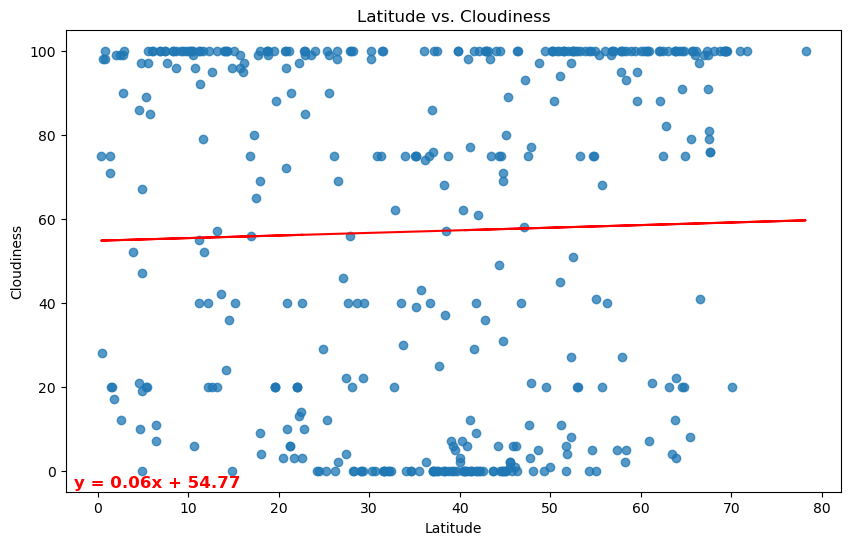

In [20]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]

plot_linear_regression(
    x_values_northern, 
    y_values_northern, 
    x_label="Latitude", 
    y_label="Cloudiness", 
    title="Latitude vs. Cloudiness", 
    save_path="output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png")

The R² value is: 0.0118427163976961


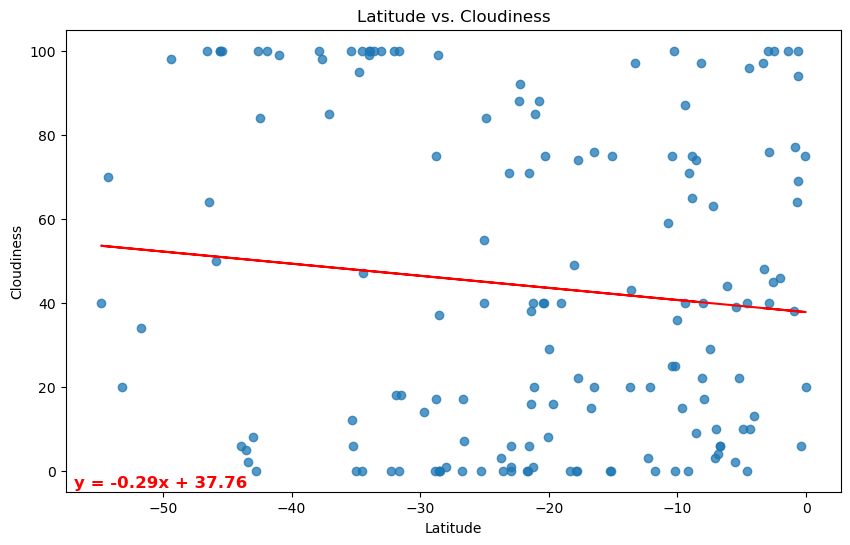

In [21]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

# Plot linear regression for Northern Hemisphere: Latitude vs. Cloudiness
plot_linear_regression(
    x_values_southern, 
    y_values_southern, 
    x_label="Latitude", 
    y_label="Cloudiness", 
    title="Latitude vs. Cloudiness", 
    save_path="output_data/Southern_Hemisphere_Lat_vs_Cloudiness.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R² value is: 0.0003031363304449


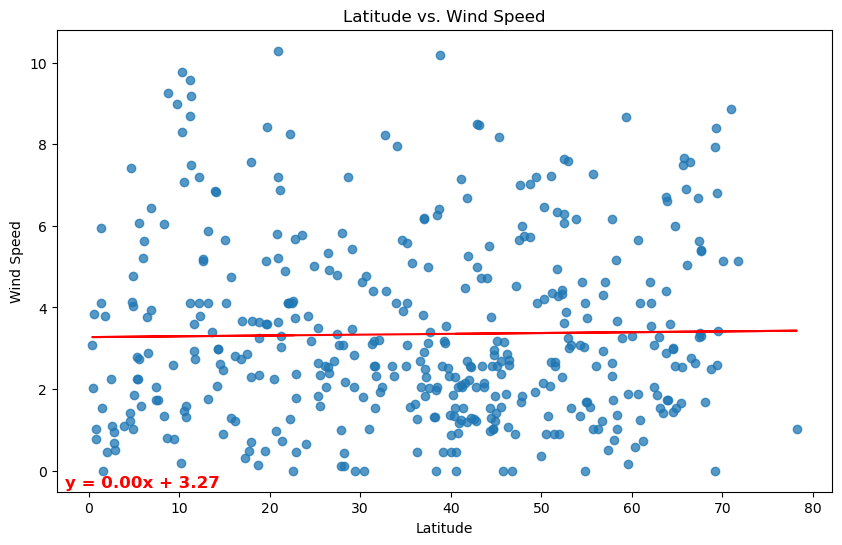

In [22]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]

plot_linear_regression(
    x_values_northern, 
    y_values_northern, 
    x_label="Latitude", 
    y_label="Wind Speed", 
    title="Latitude vs. Wind Speed", 
    save_path="output_data/Northern_Hemisphere_Lat_vs_Wind_Speed.png")

The R² value is: 0.0126868361496703


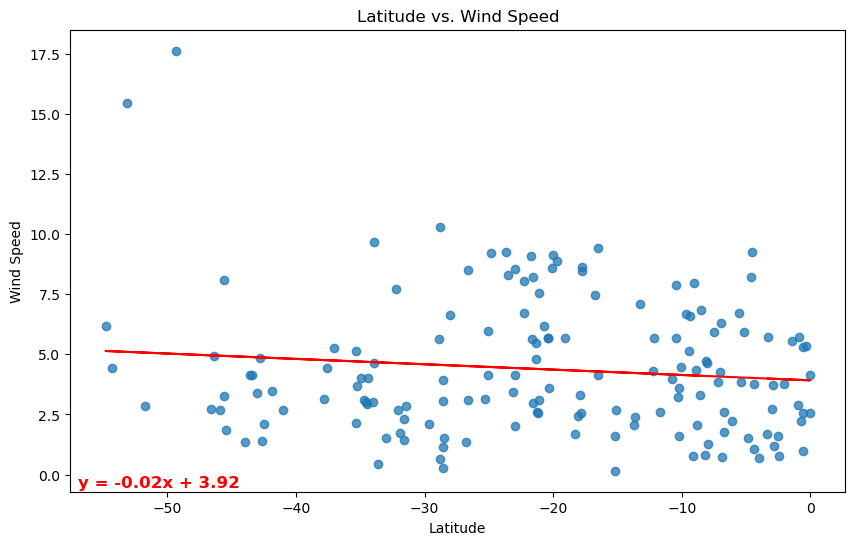

In [23]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

# Plot linear regression for Northern Hemisphere: Latitude vs. Cloudiness
plot_linear_regression(
    x_values_southern, 
    y_values_southern, 
    x_label="Latitude", 
    y_label="Wind Speed", 
    title="Latitude vs. Wind Speed", 
    save_path="output_data/Southern_Hemisphere_Lat_vs_Wind_Speed.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between the northern and southerner hemisphere are different yet similiar, depending on what we are comparing. For example in the first comparison in the latitude versus the max temp, the lower the number of latitude, the higher temperature it
is on the northern hemisphere. For the southern hemisphere it is the complete opposite. This just shows the closer you are towards the equator (or in this case 0 for measuring latitude), the higher the temperature is. For latitude vs humidity, the northern and southern start around 70c. The linear regression lines for humidity isn't as significantly slanted compared to those compared to max temperature. Both graphs look similar in a sense as both lines are sligthly tilted, but northern is tilted going down and the southern is tilting going up. 
For the cloudiness, the northern hemisphere regression line is going in a positive direction as the latitude is decreases, where the southern hemisphere regression line is a positive direction but decreases in temperature as latitude decreases. Lastly comparing wind speed, the northern hemisphere starts a little lower speed nearing 4 and the speed increases as the latitude increases. With the southern hemisphere, the speed decreases as the latitude increases into the positives.      